In [68]:
import requests
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import csv

from citipy import citipy
from api_keys import api_key

In [69]:
latitudes = []
longitudes =[]
coordinates = []

In [70]:
# Get random coordinates from each quadrant.

#1st quadrant
latitudes = [random.uniform(0, 90) for x in range(500)]  
longitudes = [random.uniform(0, -180) for x in range(500)]
first_coordinates = list(zip(latitudes, longitudes))

#2nd quadrant
latitudes = [random.uniform(0, 90) for x in range(500)]
longitudes = [random.uniform(0, 180) for x in range(500)]
second_coordinates =(list(zip(latitudes, longitudes)))

#3rd quadrant
latitudes = [random.uniform(0, -90) for x in range(500)]
longitudes = [random.uniform(0, -180) for x in range(500)]
third_coordinates = list(zip(latitudes, longitudes))
              
#4th quadrant
latitudes = [random.uniform(0, -90) for x in range(500)]
longitudes = [random.uniform(0, 180) for x in range(500)]
fourth_coordinates = list(zip(latitudes, longitudes))
 
coordinates = first_coordinates + second_coordinates + third_coordinates + fourth_coordinates

In [71]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

In [72]:
non_repeat_city_list = {}

temperature_list = []
humidity_list = []
cloudiness_list = []
city_list = []
country_list = []
wind_speed_list = []
latitude_list = []
longitude_list = []

In [73]:
# Pass coordinates to citipy to find closest city.
num_found = 0
total_processed = 0

with open ("CitiesFound.csv", 'w', newline='') as csvfile:
    cities_csv = csv.writer(csvfile, delimiter=',')
    
    for lat, lon in coordinates:
        total_processed += 1
        nearest_city = citipy.nearest_city(lat, lon)
        city = nearest_city.city_name
        country = nearest_city.country_code

        if city == '':
            print("City not found. Skipping city")
            continue

        if city not in non_repeat_city_list:
            query_url = f"{url}APPID={api_key}&units={unit}&q={city}&country={country}"
            response = requests.get(query_url).json()

            if 'id' not in response:
                print("City not found. Skipping city")
                continue

            num_found += 1
            city_number = response['id']
            print(f"Request {num_found} - city#: {city_number}; city: {city}, country: {country}")
            cities_csv.writerow([num_found, city_number, city, country])

            # Capture city info from openweathermap, as well as actual latitude and longitude of closest city.
            temperature = response['main']['temp_max']
            temperature_list.append(temperature)

            humidity = response['main']['humidity']
            humidity_list.append(humidity)

            cloudiness = response['clouds']['all']
            cloudiness_list.append(cloudiness)

            wind_speed = response['wind']['speed']
            wind_speed_list.append(wind_speed)

            actual_latitude = response['coord']['lat']
            latitude_list.append(actual_latitude)

            actual_longitude = response['coord']['lon']
            longitude_list.append(actual_longitude)

            city_list.append(city.title())
            country_list.append(country.upper())

            non_repeat_city_list[city] = country, temperature, humidity, cloudiness, wind_speed, actual_latitude, actual_longitude

Request 1 - city#: 3833859; city: barrow, country: us
Request 2 - city#: 3428576; city: san pedro, country: bz
Request 3 - city#: 262462; city: saint george, country: bm
City not found. Skipping city
Request 4 - city#: 3374210; city: sao filipe, country: cv
Request 5 - city#: 4224413; city: statesboro, country: us
Request 6 - city#: 2618795; city: klaksvik, country: fo
Request 7 - city#: 3576994; city: cockburn town, country: bs
City not found. Skipping city
Request 8 - city#: 5848280; city: kapaa, country: us
Request 9 - city#: 5339840; city: costa mesa, country: us
Request 10 - city#: 3372472; city: vila franca do campo, country: pt
Request 11 - city#: 5880568; city: bethel, country: us
Request 12 - city#: 5859699; city: college, country: us
Request 13 - city#: 2508813; city: adrar, country: dz
City not found. Skipping city
Request 14 - city#: 1260086; city: patna, country: gb
Request 15 - city#: 5882953; city: aklavik, country: ca
Request 16 - city#: 6167817; city: torbay, country: 

Request 128 - city#: 3652758; city: puerto baquerizo moreno, country: ec
Request 129 - city#: 3981460; city: coahuayana, country: mx
Request 130 - city#: 4149959; city: cape canaveral, country: us
Request 131 - city#: 3374083; city: bathsheba, country: bb
City not found. Skipping city
City not found. Skipping city
Request 132 - city#: 3174050; city: mantua, country: cu
Request 133 - city#: 5393052; city: santa cruz, country: cr
Request 134 - city#: 5380420; city: pacifica, country: us
Request 135 - city#: 5688789; city: dickinson, country: us
City not found. Skipping city
Request 136 - city#: 5380437; city: pacific grove, country: us
Request 137 - city#: 2069194; city: jamestown, country: us
Request 138 - city#: 3491161; city: bull savanna, country: jm
City not found. Skipping city
Request 139 - city#: 3421982; city: maniitsoq, country: gl
Request 140 - city#: 5554072; city: juneau, country: us
City not found. Skipping city
Request 141 - city#: 5383559; city: placerville, country: us
R

Request 254 - city#: 1793036; city: tengzhou, country: cn
City not found. Skipping city
Request 255 - city#: 2214827; city: mizdah, country: ly
City not found. Skipping city
Request 256 - city#: 2121025; city: srednekolymsk, country: ru
Request 257 - city#: 608872; city: makat, country: kz
Request 258 - city#: 7626384; city: hovd, country: mn
Request 259 - city#: 2525772; city: acri, country: it
Request 260 - city#: 1651810; city: airai, country: pw
City not found. Skipping city
Request 261 - city#: 1813812; city: danshui, country: cn
Request 262 - city#: 1163054; city: turbat, country: pk
Request 263 - city#: 1120985; city: zaranj, country: af
Request 264 - city#: 1490256; city: talnakh, country: ru
City not found. Skipping city
Request 265 - city#: 1637001; city: biak, country: id
Request 266 - city#: 2347470; city: bauchi, country: ng
City not found. Skipping city
Request 267 - city#: 320557; city: bozuyuk, country: tr
Request 268 - city#: 1733782; city: victoria, country: sc
Reques

Request 386 - city#: 98182; city: baghdad, country: iq
Request 387 - city#: 1280957; city: jiuquan, country: cn
Request 388 - city#: 762021; city: plonsk, country: pl
Request 389 - city#: 1850144; city: nishihara, country: jp
Request 390 - city#: 1500399; city: lokosovo, country: ru
Request 391 - city#: 330534; city: mizan teferi, country: et
Request 392 - city#: 1804646; city: huangchuan, country: cn
Request 393 - city#: 778707; city: mehamn, country: no
City not found. Skipping city
Request 394 - city#: 526749; city: mikhaylovskoye, country: ru
Request 395 - city#: 477940; city: ust-tsilma, country: ru
Request 396 - city#: 556268; city: ostrovnoy, country: ru
Request 397 - city#: 3146487; city: raudeberg, country: no
Request 398 - city#: 2036069; city: linjiang, country: cn
City not found. Skipping city
Request 399 - city#: 1501429; city: kuminskiy, country: ru
City not found. Skipping city
City not found. Skipping city
Request 400 - city#: 49747; city: xuddur, country: so
Request 40

Request 511 - city#: 3938531; city: iberia, country: pe
Request 512 - city#: 3911925; city: el alto, country: pe
Request 513 - city#: 3932145; city: pisco, country: pe
Request 514 - city#: 3665016; city: benjamin constant, country: br
Request 515 - city#: 3472638; city: alegrete, country: br
City not found. Skipping city
Request 516 - city#: 3466980; city: caravelas, country: br
Request 517 - city#: 3448903; city: sao joao da barra, country: br
Request 518 - city#: 3936456; city: lima, country: pe
City not found. Skipping city
Request 519 - city#: 3455065; city: paranaiba, country: br
Request 520 - city#: 3471551; city: arenapolis, country: br
City not found. Skipping city
Request 521 - city#: 3661944; city: tefe, country: br
City not found. Skipping city
Request 522 - city#: 3924908; city: pimenta bueno, country: br
City not found. Skipping city
Request 523 - city#: 3451399; city: ribas do rio pardo, country: br
Request 524 - city#: 3388847; city: sao felix do xingu, country: br
Reque

City not found. Skipping city
City not found. Skipping city
Request 636 - city#: 934482; city: grand baie, country: mu
Request 637 - city#: 2194098; city: ahipara, country: nz
Request 638 - city#: 1641899; city: labuhan, country: id
Request 639 - city#: 2165087; city: gold coast, country: au
Request 640 - city#: 199284; city: chuka, country: ke
City not found. Skipping city
Request 641 - city#: 212730; city: kisangani, country: cd
Request 642 - city#: 1650233; city: banjar, country: id
City not found. Skipping city
City not found. Skipping city
Request 643 - city#: 898947; city: senanga, country: zm
Request 644 - city#: 2240449; city: luanda, country: ao
Request 645 - city#: 1028434; city: quelimane, country: mz
City not found. Skipping city
Request 646 - city#: 2140558; city: koumac, country: nc
Request 647 - city#: 1054329; city: vangaindrano, country: mg
City not found. Skipping city
City not found. Skipping city
Request 648 - city#: 6539761; city: roma, country: au
Request 649 - ci

In [74]:
dt = datetime.datetime.now().strftime("%m-%d-%Y %I:%M %p")

In [75]:
city_df = pd.DataFrame({
    "City": city_list,
    "Country": country_list,
    "Temperature": temperature_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Latitude": latitude_list,
    "Longitude": longitude_list
})
city_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Barrow,US,64.06,48,58,16.22,-38.31,-60.23
1,San Pedro,BZ,60.30,64,0,8.25,-33.68,-59.66
2,Saint George,BM,46.40,93,40,2.51,39.45,22.34
3,Sao Filipe,CV,71.83,83,92,17.67,14.90,-24.50
4,Statesboro,US,68.00,55,1,3.36,32.45,-81.78


In [76]:
print(f"Total Coordinate Pairs Processed: {total_processed}")
print(f"Num Cities Found: {num_found}")

Total Coordinate Pairs Processed: 2000
Num Cities Found: 680


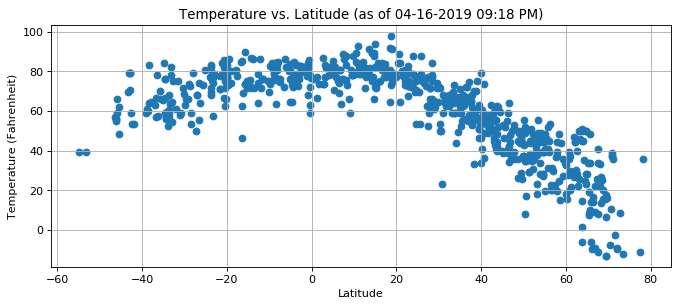

In [77]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")

plt.title(f"Temperature vs. Latitude (as of {dt})")
plt.savefig("Temp vs Latitude.png")
plt.grid()

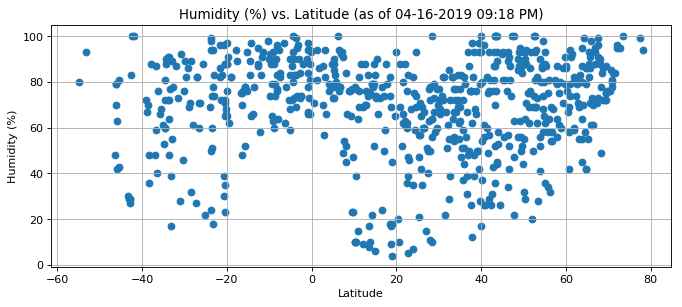

In [78]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.title(f"Humidity (%) vs. Latitude (as of {dt})")
plt.savefig("Humidity vs Latitude.png")
plt.grid()

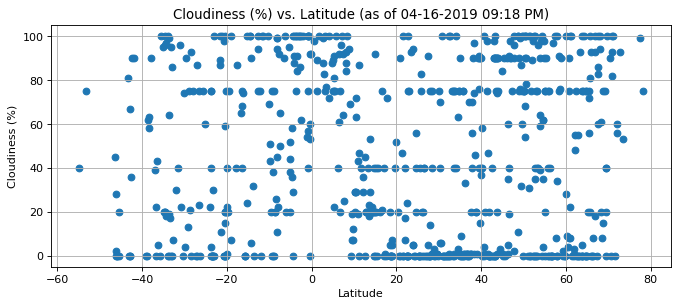

In [79]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.title(f"Cloudiness (%) vs. Latitude (as of {dt})")
plt.savefig("Cloudiness vs Latitude.png")
plt.grid()

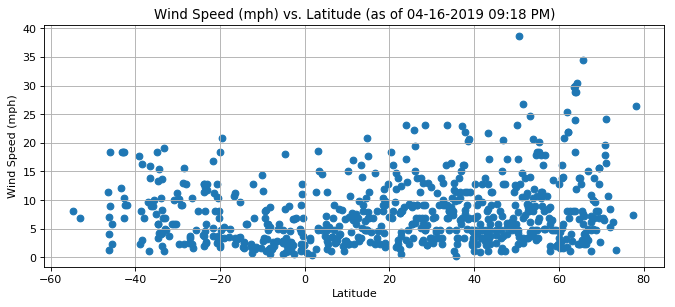

In [80]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.title(f"Wind Speed (mph) vs. Latitude (as of {dt})")
plt.savefig("Wind Speed vs Latitude.png")
plt.grid()

## 3 Observable Trends

### 1. It took 2000 randomly selected latitude/longitude coordinates to successfully locate 680 cities. Approximately 66% of the randomly selected latitude/longitude coordinates were either located far enough away from a city for citipy to find a match or the city name had already been processed and, thus, was skipped. This could conclude that city names are repeated throughout states, countries and the world.

### 2. Although the Tropics (latitude 23.5 - Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China) are known as the hottest places on earth, it is interesting that even hotter temperatures are seen around latitude 19 (Africa, Asia, the Indian Ocean, the Pacific Ocean, North America, the Caribbean and the Atlantic Ocean).

### 3. Cloudiness is not relative to latitude, as percent cloudiness varies fairly evenly across latitudes.